In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
ori_data = pd.read_csv('csgo_round_snapshots.csv')
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [4]:
ori_data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [5]:
### Features seleting (Assumed to be useful):
# time_left
# bomb_planted
# ct_health, ct_armor, ct_money, ct_helmets, ct_defuse_kits, ct_players_alive
# t_health, t_armor, t_money, t_helmets, t_players_alive
# ct_weapon_ak47, ct_weapon_awp, ct_weapon_m4a1s, ct_weapon_m4a4, ct_weapon_deagle
# t_weapon_ak47, t_weapon_awp, t_weapon_m4a1s, t_weapon_m4a4, t_weapon_deagle, t_weapon_tec9
# ct_grenade_hegrenade, ct_grenade_flashbang, ct_grenade_smokegrenade, ct_grenade_incendiarygrenade, ct_grenade_molotovgrenade
# t_grenade_hegrenade, t_grenade_flashbang, t_grenade_smokegrenade, t_grenade_incendiarygrenade, t_grenade_molotovgrenade
## For incendiary in T, probablyt can combine with molotov to reduce complexity?

### Doubt to be useful
# ct_score, t_score
# map (Might be useful tgt with bomb_planted)
# ct_weapon_aug, ct_weapon_bizon, ct_weapon_cz75auto, ct_weapon_elite, ct_weapon_famas, ct_weapon_g3sg1, ct_weapon_galilar,  ct_weapon_glock
# t_weapon_aug, t_weapon_bizon, t_weapon_cz75auto, t_weapon_elite, t_weapon_famas, t_weapon_g3sg1, t_weapon_galilar, t_weapon_glock

# ct_weapon_mag7, ct_weapon_m249, ct_weapon_mac10, ct_weapon_mp5sd, ct_weapon_mp7, ct_weapon_mp9, ct_weapon_negev, ct_weapon_nova
# t_weapon_mag7, t_weapon_m249, t_weapon_mac10, t_weapon_mp5sd, t_weapon_mp7, t_weapon_mp9, t_weapon_negev, t_weapon_nova

# ct_weapon_p90, ct_weapon_r8revolver, ct_weapon_sawedoff, ct_weapon_scar20, ct_weapon_sg553, ct_weapon_ssg08, ct_weapon_ump45, ct_weapon_xm1014, ct_weapon_fiveseven
# t_weapon_p90, t_weapon_r8revolver, t_weapon_sawedoff, t_weapon_scar20, t_weapon_sg553, t_weapon_ssg08, t_weapon_ump45, t_weapon_xm1014, t_weapon_fiveseven

# ct_weapon_usps, ct_weapon_p250, ct_weapon_p2000
# t_weapon_usps, t_weapon_p250, t_weapon_p2000


### 100% not useful
# ct_grenade_decoygrenade
# t_grenade_decoygrenade


### Data preprocessing
# map, round_winner = object
# bomb_planted = bool

## T = 0, CT = 1
data = ori_data
y_data = ori_data['round_winner'].map({'T': 0, 'CT': 1})
data['bomb_planted'] = ori_data['bomb_planted'].map({False: 0, True: 1})

## One hot enconding the map
oneHot_map = pd.get_dummies(data['map'], dtype='int')
data = pd.concat([data, oneHot_map], axis=1)

## Drop irrelavent features
x_data = data.drop(['t_grenade_decoygrenade', 'ct_grenade_decoygrenade',
                    'ct_weapon_bizon', 't_weapon_bizon', 'ct_weapon_g3sg1', 't_weapon_g3sg1',  
                    'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_r8revolver', 't_weapon_r8revolver',
                    'ct_weapon_scar20', 't_weapon_scar20',
                    'round_winner', 'map'
                    ], axis=1)

## Split data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print(x_train, y_train)

        time_left  ct_score  t_score  bomb_planted  ct_health  t_health  \
46932       33.46      13.0     15.0             1      338.0      80.0   
10028       51.48      15.0      7.0             0      300.0     212.0   
54116       94.90      17.0     15.0             0      381.0     495.0   
97546       99.70       4.0      5.0             0      500.0     274.0   
2964        94.89      11.0     12.0             0      500.0     500.0   
...           ...       ...      ...           ...        ...       ...   
119879     174.95       5.0      8.0             0      500.0     500.0   
103694      30.75       4.0      0.0             1      390.0     303.0   
860         74.95       4.0      3.0             0      500.0     400.0   
15795      114.91       0.0      0.0             0      500.0     500.0   
121958      54.94       4.0     12.0             0      463.0     400.0   

        ct_armor  t_armor  ct_money  t_money  ...  ct_grenade_molotovgrenade  \
46932      384.0   

# Visualize data freely

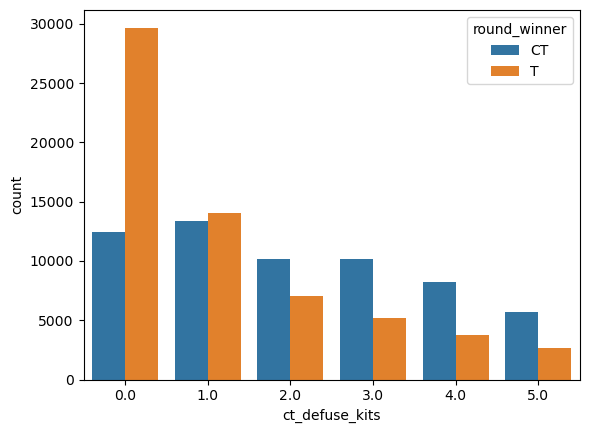

In [7]:
# Obviously, defuse kit is important...
fig = sns.countplot(x="ct_defuse_kits", hue='round_winner', data=ori_data) 


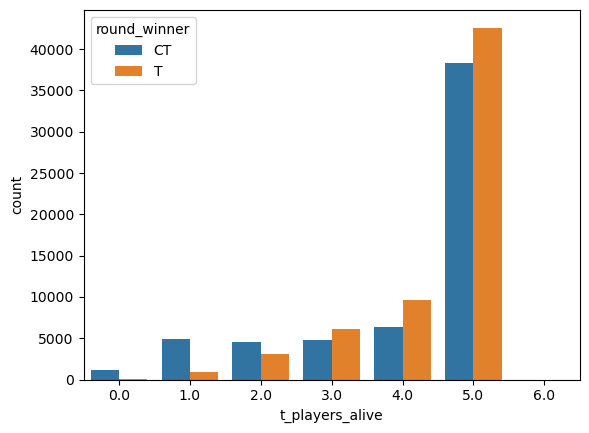

In [24]:
fig = sns.countplot(x="t_players_alive", hue='round_winner', data=ori_data)
